Esse projeto é referente a análise de dados dos passageiros do naufrágio do navio Titanic. A ideia aqui é através da analise desses dados respordermos algumas perguntas referentes ao naufrágio. 

In [2]:
#-> Importando bibliotecas necessárias e carregando o arquivo de dados.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

df_t = pd.read_csv('titanic-data-6.csv')

#Verificando os dados carregados
df_t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Avaliando os dados
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
#numero de amostras  (linhas e colunas)
print("O arquivo possui {0} amostras e {1} colunas".format(
        df_t.shape[0], df_t.shape[1] ))

O arquivo possui 891 amostras e 12 colunas


In [5]:
#Colunas com valores faltantes
print("Colunas com valores Faltantes: \n {0} \n".format(
    df_t.columns[df_t.isnull().any()].values))

Colunas com valores Faltantes: 
 ['Age' 'Cabin' 'Embarked'] 



In [6]:
#linhas duplicadas
print(" Duplicadas: {0} ".format(
        df_t.duplicated().sum()))

 Duplicadas: 0 


In [7]:
#Melhorando o indice da coluna (utilizando o PassengerId como indice)
df_t=pd.read_csv('titanic-data-6.csv', index_col='PassengerId')
df_t.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#Verificando a quantidade de colunas agora.
print("O arquivo possui {0} colunas".format(
       df_t.shape[1] ))

O arquivo possui 11 colunas


In [9]:
#Verificando a quantidade de valores unicos em cada coluna
df_t.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

Limpeza dos dados

In [10]:
#Usando a média para prencher os valores faltantes na idade
df_t['Age'].fillna(df_t['Age'].mean(), inplace=True)
#Colunas com valores faltantes
print("Colunas com valores Faltantes: \n {0} \n".format(
    df_t.columns[df_t.isnull().any()].values))

Colunas com valores Faltantes: 
 ['Cabin' 'Embarked'] 



In [11]:
#Deixando todos os rótulos em letras minusculas
df_t.rename(columns=lambda x:x.strip().lower(), inplace=True)

# confirmando as mudanças
df_t.head(1)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [30]:
#Verificando a relação da 3ª Classe com o número da Cabine
terceira_classe = df_t.query('pclass == 3')
print("{0} amostras e {1} colunas".format(
        terceira_classe.shape[0], terceira_classe.shape[1]))
print("Total de Cabines nulas na amostra: {0}".format(
    sum(df_t['cabin'].isnull())))      
print("Total de Cabines nulas da Classe 3: {0}".format(
   sum(terceira_classe['cabin'].isnull())))

491 amostras e 11 colunas
Total de Cabines nulas na amostra: 687
Total de Cabines nulas da Classe 3: 479


In [32]:
#Preenchendo valores ausentes automaticamente-Colunas Cabin - Embarked
df_t['cabin'].fillna('Sem Cabine', inplace=True)
df_t['embarked'].fillna('N', inplace=True) # N = Sem porto de embarcação

#Confirmando as mudanças nas colunas com valores faltantes
print("Colunas com valores Faltantes: \n {0} \n".format(
    df_t.columns[df_t.isnull().any()].values))

Colunas com valores Faltantes: 
 [] 



Agora vamos as perguntas!!!!! 

Teve mais sobreviventes do sexo masculino ou feminino? 

In [36]:
#Buscando a quantidade de sobreviventes, total masculino e total feminino
survive = df_t.query('survived == 1')
male = df_t.query("sex == 'male'")
female = df_t.query("sex == 'female'")
male_survive = male.query('survived == 1')
female_survive = female.query('survived == 1')
print("Total de sobreviventes: {}".format(survive.shape[0]))
print("Total de Homens sobreviventes: {0}".format(male_survive.shape[0]))
print("Total de Mulheres sobreviventes: {0}".format(female_survive.shape[0]))


Total de sobreviventes: 342
Total de Homens sobreviventes: 109
Total de Mulheres sobreviventes: 233


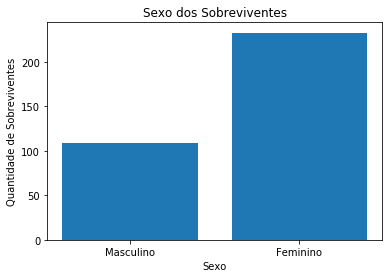

In [37]:
locations = [1, 2]
heights = [male_survive.shape[0], female_survive.shape[0]]
labels = ['Masculino', 'Feminino']
plt.bar(locations, heights, tick_label=labels)
plt.title('Sexo dos Sobreviventes')
plt.xlabel('Sexo')
plt.ylabel('Quantidade de Sobreviventes');

Conclusão - Podemos perceber que a grande maioria dos sobreviventes foram do sexo feminino. 